# Mountain Car Miniproject Notebook

In [1]:
from RandomAgent import RandomAgent
from DQNAgent import DQNAgent
from DynaAgent import DynaAgent
import matplotlib.pyplot as plt
import gymnasium as gym
from collections import namedtuple, deque
import numpy as np
env = gym.make('MountainCar-v0')

## Random Agent

### Single random agent

In [2]:
simple_random = RandomAgent(env)
simple_random.run()

In [3]:
print(f"Number of steps during episode = {simple_random.nb_step}")

Number of steps during episode = 200


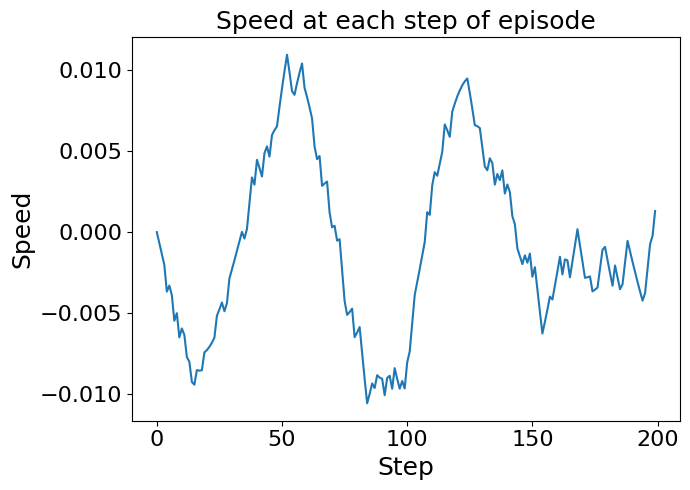

In [4]:
plt.figure(figsize=(7, 5))
plt.plot(simple_random.observed_states_speed)
plt.title('Speed at each step of episode', fontsize=18)
plt.xlabel('Step', fontsize=18)
plt.ylabel('Speed', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tight_layout()
#plt.savefig('random_speed.png') 
plt.show()

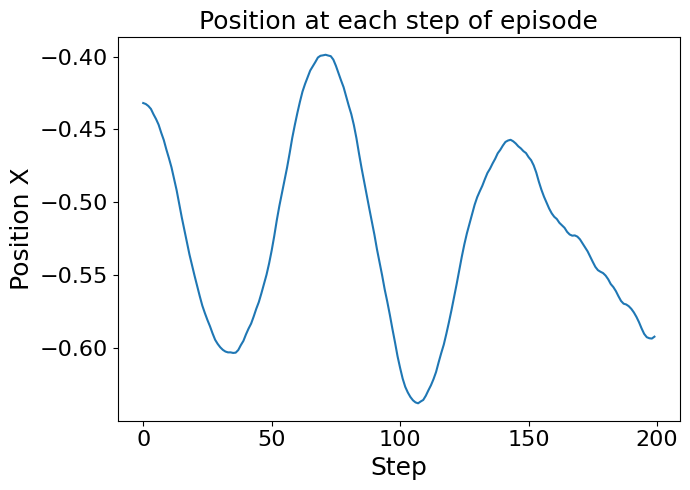

In [5]:
plt.figure(figsize=(7, 5))
plt.plot(simple_random.observed_states_position)
plt.title('Position at each step of episode', fontsize=18)
plt.xlabel('Step',fontsize=18)
plt.ylabel('Position X',fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tight_layout()
#plt.savefig('random_position.png') 
plt.show()

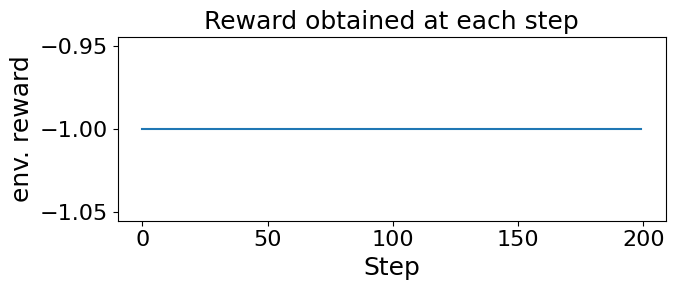

In [6]:
plt.figure(figsize=(7, 3))
plt.plot(simple_random.observed_reward)
plt.title('Reward obtained at each step', fontsize=18)
plt.xlabel('Step',fontsize=18)
plt.ylabel('env. reward',fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tight_layout()
#plt.savefig('random_envreward.png') 
plt.show()

### Multiple random agent 

In [7]:
nb_episode = 100
nb_step_per_episode = np.zeros((100))

In [8]:
for i in range(nb_episode):
    simple_random = RandomAgent(env, seed = i)
    simple_random.run()
    nb_step_per_episode[i] = simple_random.nb_step

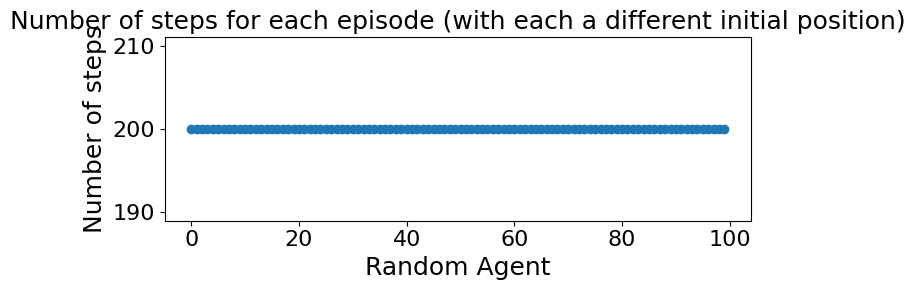

In [9]:
plt.figure(figsize=(7, 3))
plt.scatter(range(nb_episode),nb_step_per_episode)
plt.title('Number of steps for each episode (with each a different initial position)', fontsize=18)
plt.ylabel('Number of steps',fontsize=18)
plt.xlabel('Random Agent',fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tight_layout()
#plt.savefig('multiple_random.png') 
plt.show()

## DQN Agent

### Basic DQN Agent

In [2]:
basicDQN = DQNAgent(env)

In [3]:
environnement_reward, auxiliary_reward, total_reward, loss, solved_Task = basicDQN.training(1000, 64)

100%|██████████| 1000/1000 [17:28<00:00,  1.05s/it]


In [4]:
window_size = 20
window = np.ones(int(window_size)) / float(window_size)
loss2 = np.convolve(loss, window, 'same')

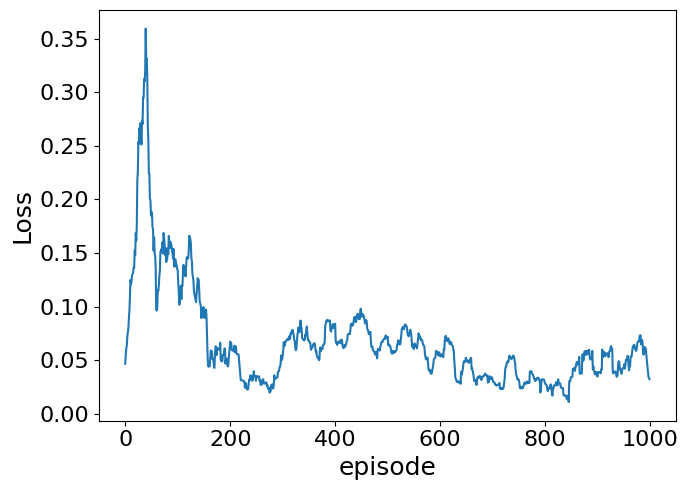

In [5]:
plt.figure(figsize=(7, 5))
plt.plot(loss2)
#plt.title('Loss at each episode', fontsize=18)
plt.xlabel('episode', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tight_layout()
plt.savefig('DQNbasic_loss.png') 
plt.show()

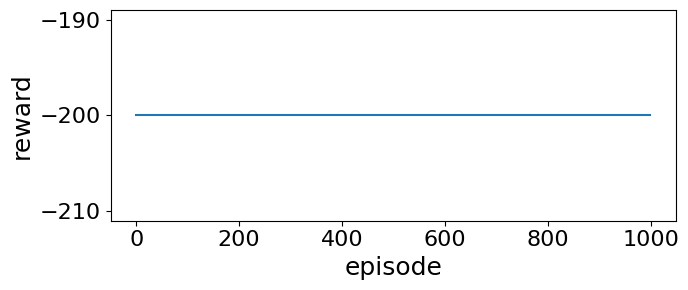

In [6]:
plt.figure(figsize=(7, 3))
plt.plot(total_reward)
#plt.title('Reward at each episode', fontsize=18)
plt.xlabel('episode', fontsize=18)
plt.ylabel('reward', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tight_layout()
plt.savefig('DQNbasic_reward.png') 
plt.show()

### DQN with heuristic reward function

In [2]:
heuristicDQN = DQNAgent(env, lr_DQN =0.003, global_reward_factor = 7.5,epsilon_decay = 30,use_log = True, heuristic_reward = True,neurons_DQN = 32)
environnement_reward, auxiliary_reward, total_reward, loss, solved_Task = heuristicDQN.training(3000, 64)

------------------------------------------
We will log this experiment in directory ./new/@global_reward_factor=7.5@20240528-152257
------------------------------------------


100%|██████████| 3000/3000 [59:13<00:00,  1.18s/it] 


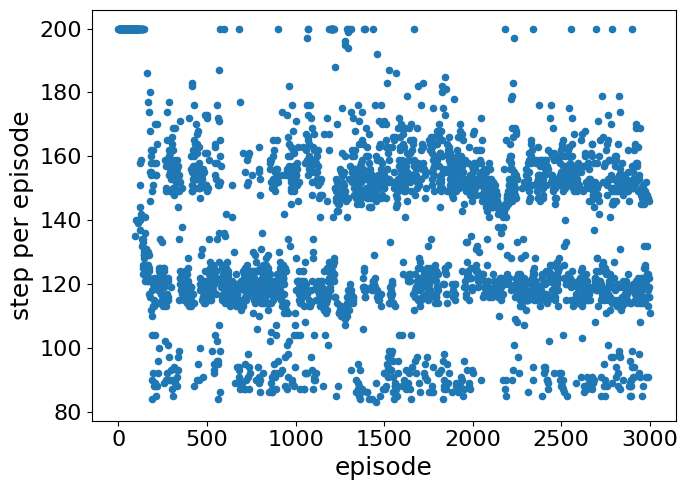

In [3]:
plt.figure(figsize=(7, 5))
plt.scatter(np.arange(3000),np.abs(environnement_reward), s=15)
#plt.title('Loss at each episode', fontsize=18)
plt.xlabel('episode', fontsize=18)
plt.ylabel('step per episode', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tight_layout()
plt.savefig('DQNheur_nbstep.png') 
plt.show()

In [4]:
window_size = 20
window = np.ones(int(window_size)) / float(window_size)
environnement_reward2 = np.convolve(environnement_reward, window, 'same')
auxiliary_reward2 = np.convolve(auxiliary_reward, window, 'same')
total_reward2 = np.convolve(total_reward, window, 'same')

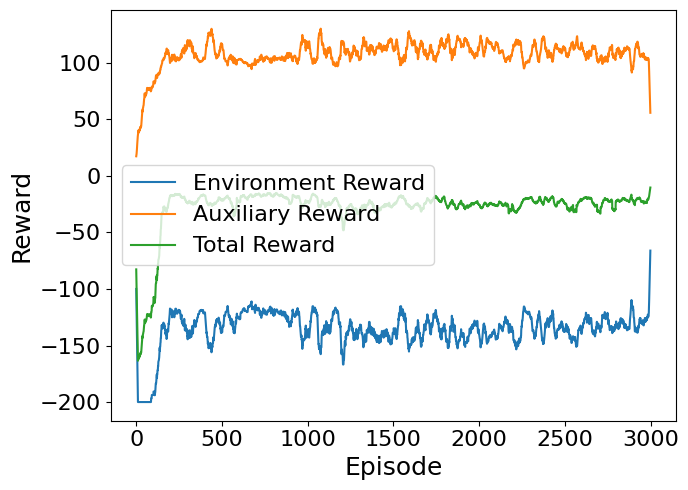

In [5]:
plt.figure(figsize=(7, 5))
plt.plot(environnement_reward2, label='Environment Reward')
plt.plot(auxiliary_reward2, label='Auxiliary Reward')
plt.plot(total_reward2, label='Total Reward')
#plt.title('Loss at each episode', fontsize=18)
plt.xlabel('Episode', fontsize=18)
plt.ylabel('Reward', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.legend(fontsize=16)
plt.tight_layout()
plt.savefig('DQNheur_reward.png') 
plt.show()

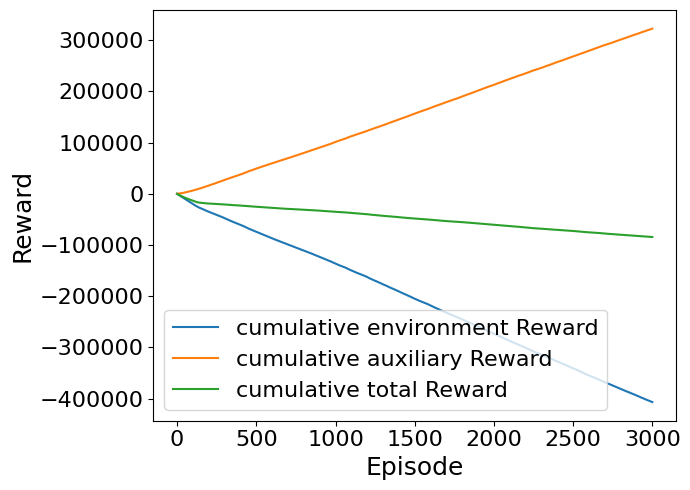

In [6]:
plt.figure(figsize=(7, 5))
plt.plot(np.cumsum(environnement_reward), label='cumulative environment Reward')
plt.plot(np.cumsum(auxiliary_reward), label='cumulative auxiliary Reward')
plt.plot(np.cumsum(total_reward), label='cumulative total Reward')
#plt.title('Loss at each episode', fontsize=18)
plt.xlabel('Episode', fontsize=18)
plt.ylabel('Reward', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.legend(fontsize=16)
plt.tight_layout()
plt.savefig('DQNheur_rewardcumul.png') 
plt.show()

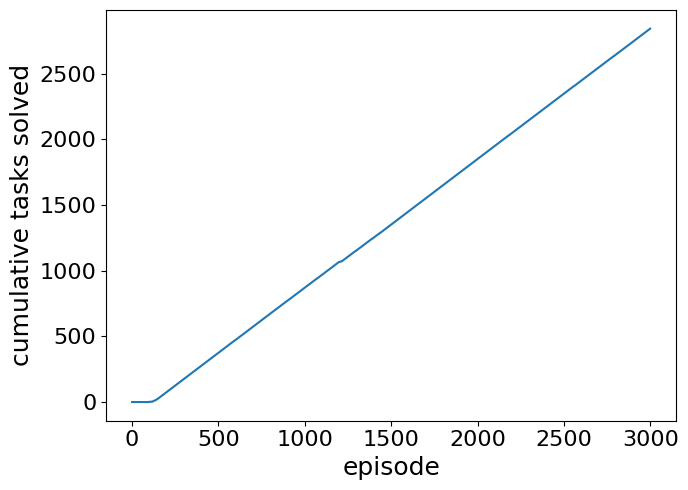

In [7]:
plt.figure(figsize=(7, 5))
plt.plot(solved_Task)
#plt.title('Loss at each episode', fontsize=18)
plt.xlabel('episode', fontsize=18)
plt.ylabel('cumulative tasks solved', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tight_layout()
plt.savefig('DQNheur_tasksolved.png') 
plt.show()

In [8]:
window_size = 20
window = np.ones(int(window_size)) / float(window_size)
loss2 = np.convolve(loss, window, 'same')

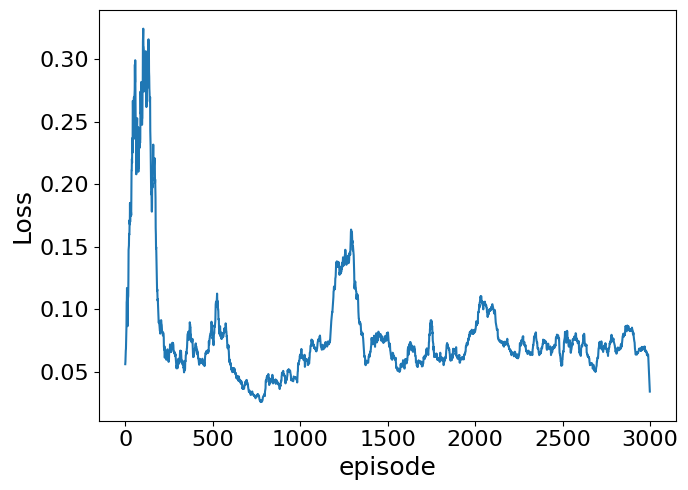

In [9]:
plt.figure(figsize=(7, 5))
plt.plot(loss2)
#plt.title('Loss at each episode', fontsize=18)
plt.xlabel('episode', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tight_layout()
plt.savefig('DQNheur_loss.png') 
plt.show()

### DQN with RND reward

In [2]:
RND_DQN = DQNAgent(env, discount_factor = 0.99, epsilon_decay = 100, capacity = 7500, RND_reward = True, global_reward_factor = 2.5, neurons_RND = 16, neurons_DQN = 32, lr_DQN =0.0025, lr_RND =0.000001)
environnement_reward, auxiliary_reward, total_reward, loss, solved_Task = RND_DQN.training(500, 64)

100%|██████████| 500/500 [08:58<00:00,  1.08s/it]


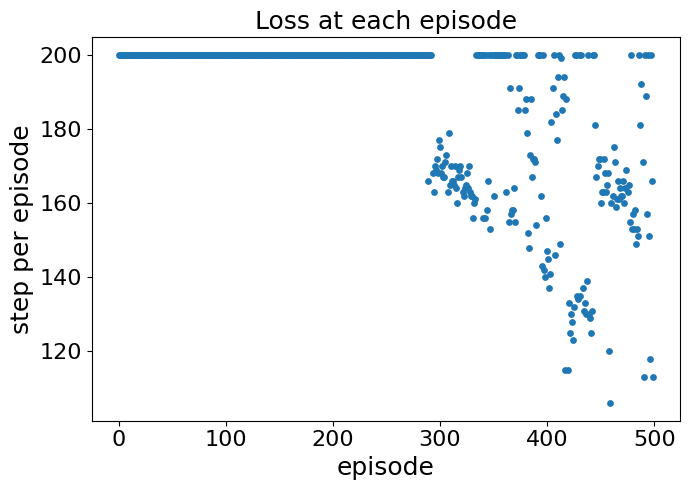

In [8]:
plt.figure(figsize=(7, 5))
plt.scatter(np.arange(500),np.abs(environnement_reward), s=15)
plt.title('Loss at each episode', fontsize=18)
plt.xlabel('episode', fontsize=18)
plt.ylabel('step per episode', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tight_layout()
#plt.savefig('DQNRND_nbstep.png') 
plt.show()

In [9]:
window_size = 20
window = np.ones(int(window_size)) / float(window_size)
environnement_reward2 = np.convolve(environnement_reward, window, 'same')
auxiliary_reward2 = np.convolve(auxiliary_reward, window, 'same')
total_reward2 = np.convolve(total_reward, window, 'same')

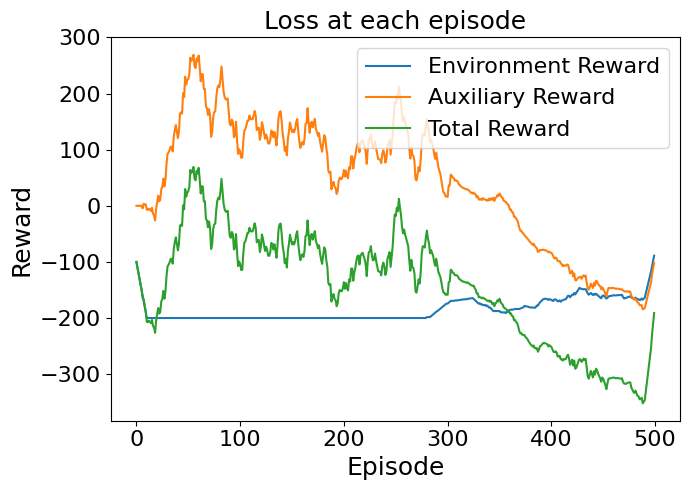

In [10]:
plt.figure(figsize=(7, 5))
plt.plot(environnement_reward2, label='Environment Reward')
plt.plot(auxiliary_reward2, label='Auxiliary Reward')
plt.plot(total_reward2, label='Total Reward')
plt.title('Loss at each episode', fontsize=18)
plt.xlabel('Episode', fontsize=18)
plt.ylabel('Reward', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.legend(fontsize=16)
plt.tight_layout()
#plt.savefig('DQNRND_reward.png') 
plt.show()

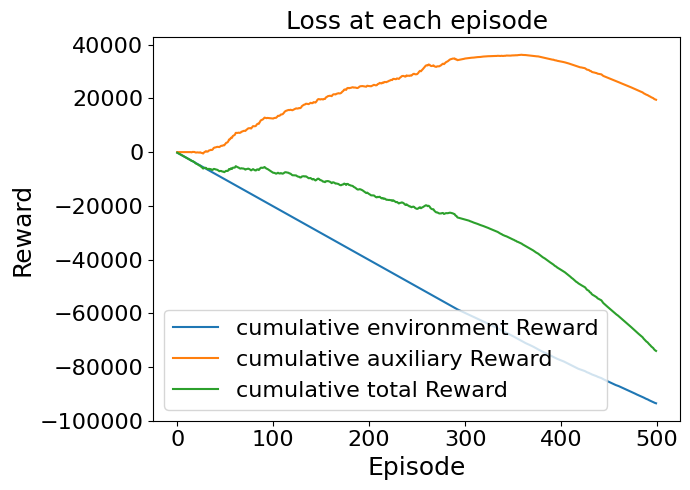

In [11]:
plt.figure(figsize=(7, 5))
plt.plot(np.cumsum(environnement_reward), label='cumulative environment Reward')
plt.plot(np.cumsum(auxiliary_reward), label='cumulative auxiliary Reward')
plt.plot(np.cumsum(total_reward), label='cumulative total Reward')
plt.title('Loss at each episode', fontsize=18)
plt.xlabel('Episode', fontsize=18)
plt.ylabel('Reward', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.legend(fontsize=16)
plt.tight_layout()
#plt.savefig('DQNRND_rewardcumul.png') 
plt.show()

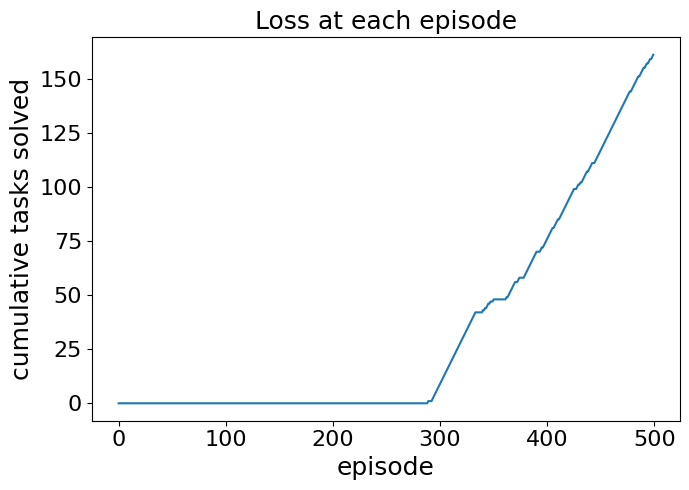

In [12]:
plt.figure(figsize=(7, 5))
plt.plot(solved_Task)
plt.title('Loss at each episode', fontsize=18)
plt.xlabel('episode', fontsize=18)
plt.ylabel('cumulative tasks solved', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tight_layout()
#plt.savefig('DQNRND_tasksolved.png') 
plt.show()

In [13]:
window_size = 20
window = np.ones(int(window_size)) / float(window_size)
loss2 = np.convolve(loss, window, 'same')

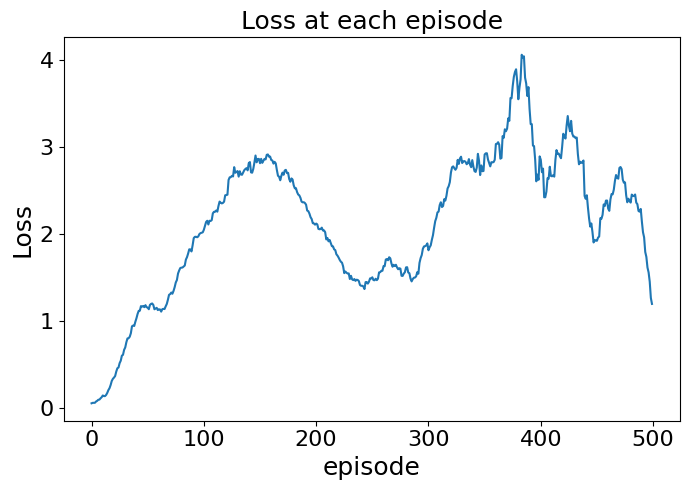

In [14]:
plt.figure(figsize=(7, 5))
plt.plot(loss2)
plt.title('Loss at each episode', fontsize=18)
plt.xlabel('episode', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tight_layout()
#plt.savefig('DQNRND_loss.png') 
plt.show()

## DynaAgent

## Comparison between Agent

In [2]:
DQN_heuristic = DQNAgent(env, heuristic_reward = True, load_model = True )
DQN_RND = DQNAgent(env, RND_reward = True, load_model = True )
Dyna = DynaAgent(env, load_model = True)

-----------variables- new--------
number of positions = 72
number of velocity = 28
number of states = 2016
self.discretization_position = [-1.2   -1.175 -1.15  -1.125 -1.1   -1.075 -1.05  -1.025 -1.    -0.975
 -0.95  -0.925 -0.9   -0.875 -0.85  -0.825 -0.8   -0.775 -0.75  -0.725
 -0.7   -0.675 -0.65  -0.625 -0.6   -0.575 -0.55  -0.525 -0.5   -0.475
 -0.45  -0.425 -0.4   -0.375 -0.35  -0.325 -0.3   -0.275 -0.25  -0.225
 -0.2   -0.175 -0.15  -0.125 -0.1   -0.075 -0.05  -0.025  0.     0.025
  0.05   0.075  0.1    0.125  0.15   0.175  0.2    0.225  0.25   0.275
  0.3    0.325  0.35   0.375  0.4    0.425  0.45   0.475  0.5    0.525
  0.55   0.575  0.6  ]
self.discretization_speed = [-0.07  -0.065 -0.06  -0.055 -0.05  -0.045 -0.04  -0.035 -0.03  -0.025
 -0.02  -0.015 -0.01  -0.005  0.     0.005  0.01   0.015  0.02   0.025
  0.03   0.035  0.04   0.045  0.05   0.055  0.06   0.065  0.07 ]
-----------------------------------------
------------------------------------------
We will log this exper

In [21]:
nb_episode = 1000
nb_step_per_episode_DQN_heuristic = np.zeros((nb_episode))
nb_step_per_episode_DQN_RND = np.zeros((nb_episode))
nb_step_per_episode_Dyna = np.zeros((nb_episode))

In [22]:
for i in range(nb_episode):
    
    DQN_heuristic.run(i)
    DQN_RND.run(i)
    Dyna.run(i)

    nb_step_per_episode_DQN_heuristic[i] = DQN_heuristic.nb_step
    nb_step_per_episode_DQN_RND[i] = DQN_RND.nb_step
    nb_step_per_episode_Dyna[i] = Dyna.test_nb_step

72

In [ ]:
nb_step_per_episode_DQN_heuristic2 = nb_step_per_episode_DQN_heuristic
nb_step_per_episode_DQN_RND2 = nb_step_per_episode_DQN_RND
nb_step_per_episode_Dyna2 = nb_step_per_episode_Dyna

#do the plot using "nb_step_per_episode"
fig, ax = plt.subplots(figsize=(10, 6))

def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Calculate moving averages
window_size_10 = 50

nb_step_per_episode_DQN_heuristic2 = moving_average(nb_step_per_episode_DQN_heuristic2, window_size_10)
nb_step_per_episode_DQN_RND2 = moving_average(nb_step_per_episode_DQN_RND2, window_size_10)
nb_step_per_episode_Dyna2 = moving_average(nb_step_per_episode_Dyna2, window_size_10)

# Plot each array with a different color
ax.plot(nb_step_per_episode_DQN_heuristic2, color='red', label='DQN heuristic')
ax.plot(nb_step_per_episode_DQN_RND2, color='blue', label='DQN RND')
ax.plot(nb_step_per_episode_Dyna2, color='green', label='Dyna')

# Adding labels and title
ax.set_xlabel('Episode')
ax.set_ylabel('Nb_steps')
ax.set_title('Number of steps per Episode')

# Adding a legend
ax.legend()

plt.savefig('compare_models.png') 
# Show the plot
plt.show()

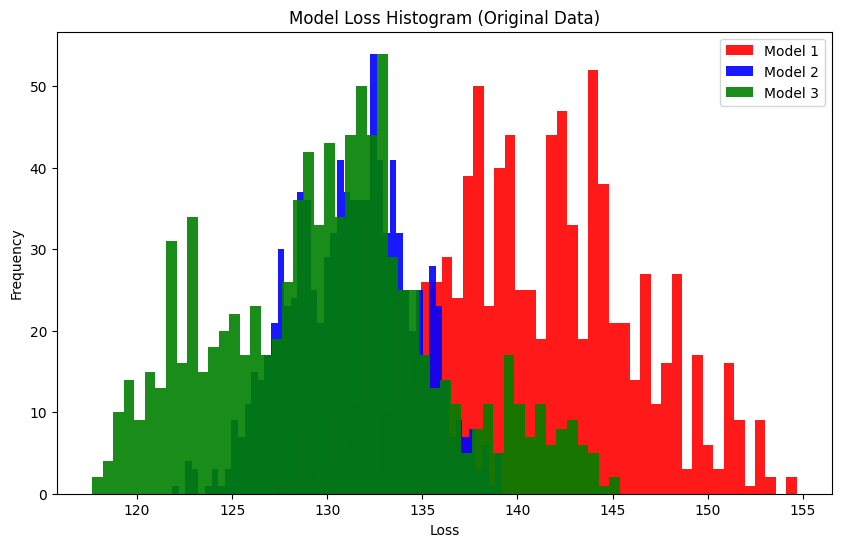

In [51]:
import numpy as np
import matplotlib.pyplot as plt

nb_step_per_episode_DQN_heuristic2 = nb_step_per_episode_DQN_heuristic
nb_step_per_episode_DQN_RND2 = nb_step_per_episode_DQN_RND
nb_step_per_episode_Dyna2 = nb_step_per_episode_Dyna

def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Calculate moving averages
window_size_50 = 50

nb_step_per_episode_DQN_heuristic2 = moving_average(nb_step_per_episode_DQN_heuristic2, window_size_10)
nb_step_per_episode_DQN_RND2 = moving_average(nb_step_per_episode_DQN_RND2, window_size_10)
nb_step_per_episode_Dyna2 = moving_average(nb_step_per_episode_Dyna2, window_size_10)

# Function to plot histogram
def plot_histograms(data1, data2, data3, title, bins=50):
    plt.figure(figsize=(10, 6))
    plt.hist(data1, bins=bins, alpha=0.7, color='red', label='DQN heuristic')
    plt.hist(data2, bins=bins, alpha=0.7, color='blue', label='DQN RND')
    plt.hist(data3, bins=bins, alpha=0.7, color='green', label='Dyna')
    plt.xlabel('Nb of Steps per Episode')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.legend()
    plt.show()

# Plot histograms for original loss values
plot_histograms(nb_step_per_episode_DQN_heuristic2, nb_step_per_episode_DQN_RND2, nb_step_per_episode_Dyna2, 'Model Loss Histogram (Original Data)')
